In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# explorar nacionales
nacionales = pd.read_csv('datos_ordenados/nacionales.csv')
nacionales.head()

,año,trimestre,mbps_media,ingresos_miles,banda_ancha_fija,dial_up,total,periodo
0,2022,3,62.46,67055930,11078691,12437,11091128,Jul-Sept 2022
1,2022,2,58.44,60335724,10946248,12436,10958684,Abr-Jun 2022
2,2022,1,55.11,55589997,10611390,12619,10624009,Ene-Mar 2022
3,2021,4,52.34,45467887,10476933,12861,10489794,Oct-Dic 2021
4,2021,3,48.46,42999944,10075184,10357,10085541,Jul-Sept 2021


In [18]:
periodo = nacionales.periodo
nacionales.drop(columns='periodo',inplace=True)

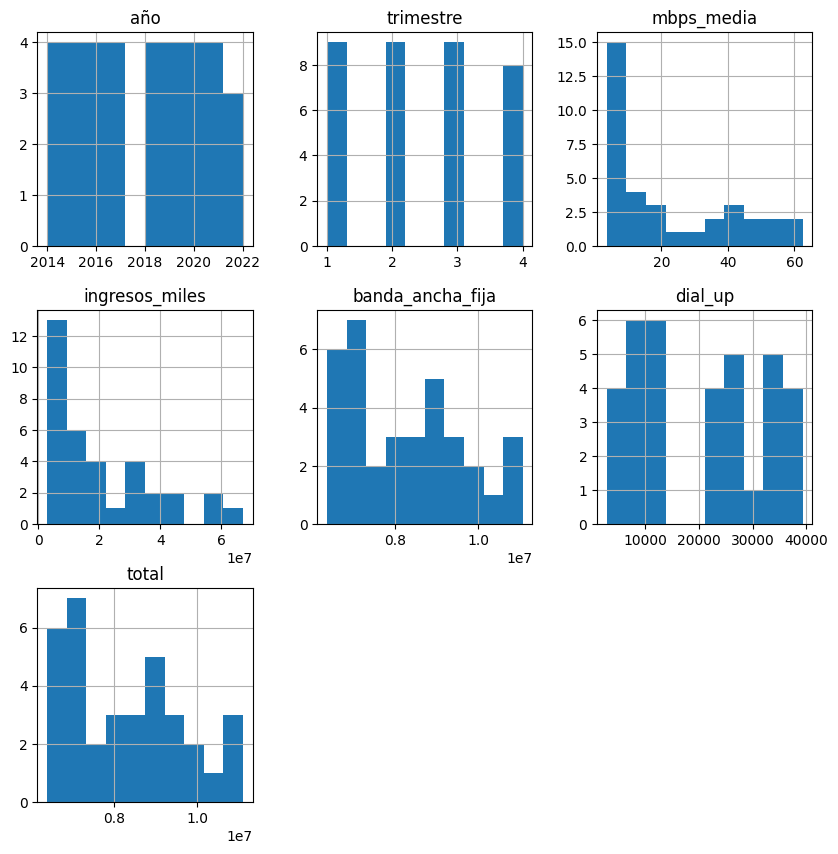

In [19]:
# ver histogramas: los datos parecen tener distribuciones bastante normales (algunas algo sesgadas) pero sin muchos outliers
nacionales.hist(figsize=(10,10))
plt.show()

<Axes: >

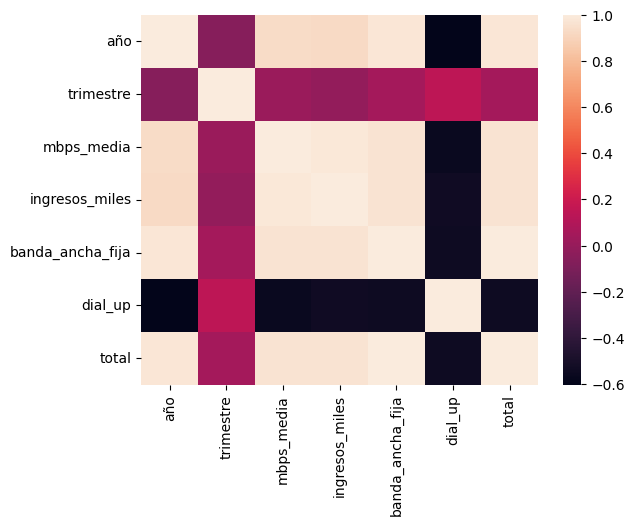

In [20]:
# ver un mapa de calor: se puede observar que en este caso, no hay una gran correlacion. Me lleva a pensar que la expansion del servicio es un factor clave
# para aumentar los ingresos en ésta área
sns.heatmap(nacionales.corr())

In [21]:
# ver provinciales
provinciales = pd.read_csv('datos_ordenados/provinciales.csv')
provinciales.head()

,año,trimestre,provincia,hasta_512kbps,512_kbps_1mbps,1mbps_6mbps,6mbps_10mbps,10mbps_20mbps,20mbps_30mbps,30mbps_x,otras_velocidades,total_x,accesos_100_hogares,banda_ancha_fija,dial_up,total_y
0,2022,3,Buenos Aires,29985,27709,290315,297915,267044,12419,3618689,65821,4721668,78.11,4715469,6199,4721668
1,2022,3,Capital Federal,517,5742,34371,67829,51946,28692,1253105,105477,1547679,122.28,1545534,2145,1547679
2,2022,3,Catamarca,71,384,3107,5389,5099,3737,50298,2208,70293,65.33,70292,1,70293
3,2022,3,Chaco,461,987,16782,18938,8049,15828,7939,3711,144146,43.86,144141,5,144146
4,2022,3,Chubut,109,1444,45707,3094,34682,15309,17563,20024,165778,84.38,164874,904,165778


In [22]:
provinciales.drop(columns='provincia',inplace=True)

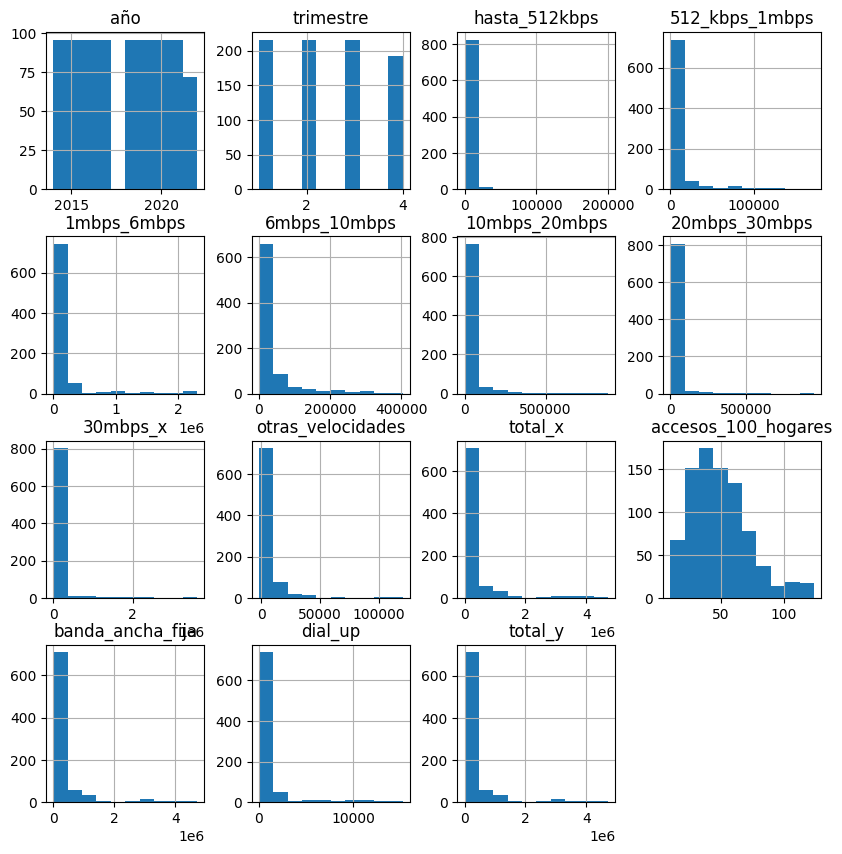

In [23]:
# chequear histogramas
provinciales.hist(figsize=(10,10))
plt.show()

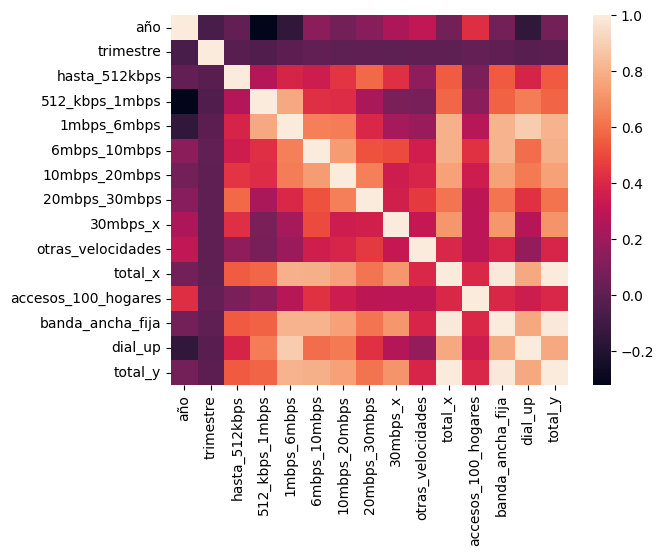

In [24]:
# correlaciones: podemos ver que accesos_100_hogares está muy correlacionado con año, lo que sugiere que año a año, el acceso ha mejorado.
# también se puede observar la relacion entre los tipos de conexiones y las velocidades de descarga
sns.heatmap(provinciales.corr())
plt.show()

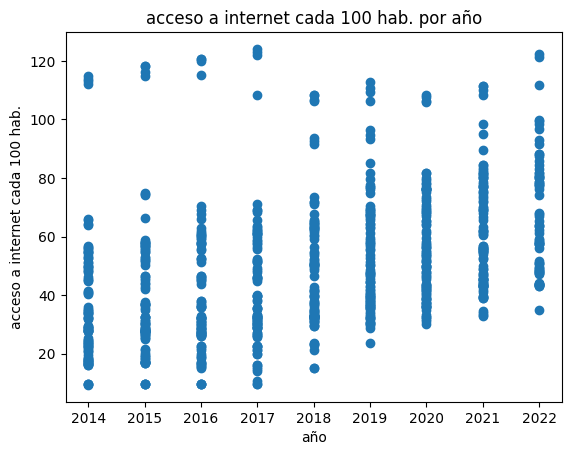

In [25]:
# ver año y acceso_100_hogares: se puede observar un aumento constante de los valores mínimos a partir de 2017. Además se puede observar que hay jurisdicciones
# que ostentan más conexiones a internet que habitantes, mientras que algunas se ubican muy por debajo del 50%
plt.scatter(provinciales.año,provinciales.accesos_100_hogares)
plt.xlabel('año')
plt.ylabel('acceso a internet cada 100 hab.')
plt.title('acceso a internet cada 100 hab. por año')
plt.show()

In [26]:
# ver locales
locales=pd.read_csv('datos_ordenados/locales.csv')
locales.head()

,provincia,partido,localidad,poblacion,adsl,cable_modem,dial_up,fibra_opt,satelital,wireless,telefonia_fija,3g,4g,link,latitud,longitud
0,BUENOS AIRES,Bahía Blanca,Villa Bordeau,0,NO,NO,NO,NO,NO,NO,NO,SI,SI,6056020,-38.647261,-62.320022
1,BUENOS AIRES,Bahía Blanca,Villa Espora,0,NO,NO,NO,NO,NO,NO,NO,NO,NO,6056020,-38.776507,-62.185183
2,BUENOS AIRES,Balcarce,Balcarce,38376,SI,SI,SI,SI,NO,SI,SI,SI,SI,6063010,-37.848278,-58.255167
3,BUENOS AIRES,Balcarce,Los Pinos,337,NO,NO,NO,NO,NO,SI,SI,NO,NO,6063020,-37.941206,-58.322592
4,BUENOS AIRES,Balcarce,Napaleofú,374,NO,NO,NO,SI,NO,SI,SI,SI,SI,6063030,-37.625498,-58.746186


In [27]:
# latitud y longitud son string --> pasar a float en la ingesta

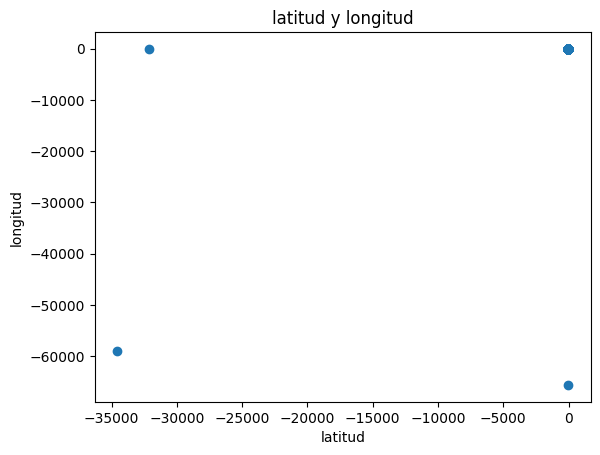

In [34]:
# para ver si hay algun problema con latitud/longitud, se puede hacer un scatterplot: al parecer hay algunos outliers (probablemente errores de tipeo)
plt.scatter(locales['latitud'],locales['longitud'])
plt.xlabel('latitud')
plt.ylabel('longitud')
plt.title('latitud y longitud')
plt.show()

In [41]:
locales.loc[locales['longitud']<-100,'longitud']=locales.longitud/1000

In [44]:
locales.loc[locales['latitud']<-100,'latitud']=locales.latitud/1000

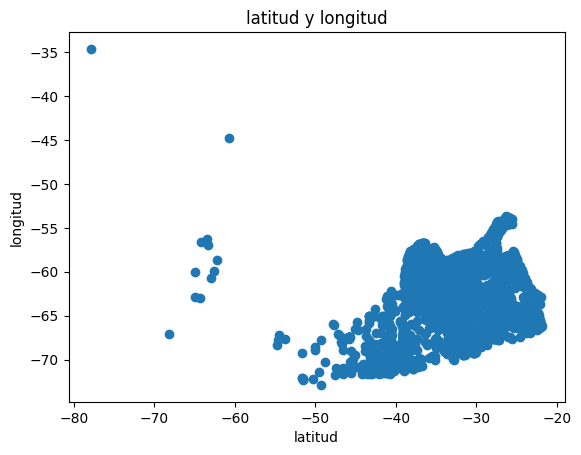

In [45]:
# ahora se puede ver una distribución más normal: pasar cambios a ingesta
plt.scatter(locales['latitud'],locales['longitud'])
plt.xlabel('latitud')
plt.ylabel('longitud')
plt.title('latitud y longitud')
plt.show()